In [1]:
from ias.Datasets import Emnist
from ias.RandomForest import RandomForest
from ias.DecisionTrees.CartDecisionTree import CartDecisionTree
from ias.Metrics import accuracy_score, confusion_matrix, show_confusion_matrix
from ias.PCA import PCA

In [2]:
import numpy as np

In [3]:
indices = np.arange(len(Emnist.attributes))
np.random.shuffle(indices)
train_size = int(1000)

train_i = indices[:train_size]
train_x = Emnist.attributes[train_i]
train_y = Emnist.labels[train_i]

test_i = indices[train_size:]
test_x = Emnist.attributes[test_i]
test_y = Emnist.labels[test_i]

In [4]:
pca = PCA(0.90)
pca.fit(train_x)

In [5]:
compressed_train_x = pca.compress(train_x)
compressed_test_x = pca.compress(test_x)

In [11]:
forest = RandomForest(CartDecisionTree, 100, 250)
forest.fit(compressed_train_x, train_y)

0.83

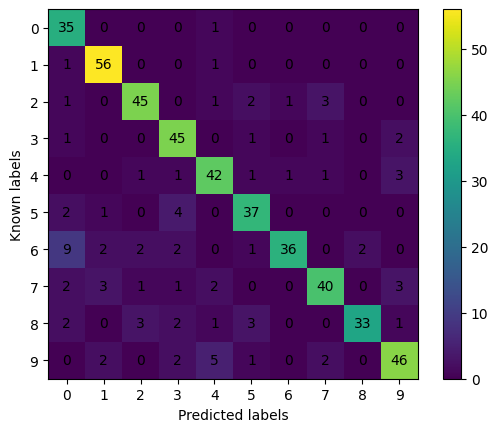

In [14]:
show_confusion_matrix(confusion_matrix(Emnist.class_number, test_y[:500], forest.predict(compressed_test_x[:500])), Emnist.class_names)
accuracy_score(test_y[:500], forest.predict(compressed_test_x[:500]))

0.997

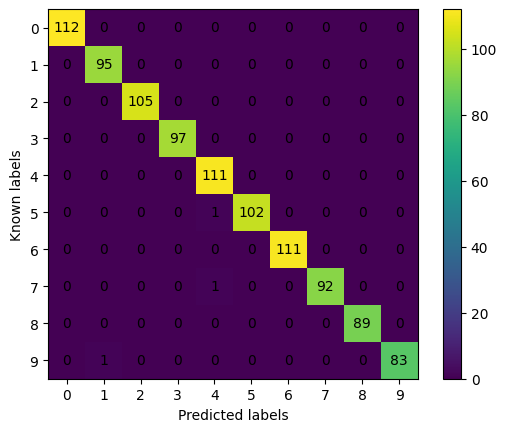

In [13]:
show_confusion_matrix(confusion_matrix(Emnist.class_number, train_y, forest.predict(compressed_train_x)), Emnist.class_names)
accuracy_score(train_y, forest.predict(compressed_train_x))